### The Canadian Cheese Directory: A Gouda Place to Start

Cheese, a beloved dairy product, has a rich history and a variety of flavors, textures, and forms. The Canadian Cheese Directory offers a fascinating glimpse into the world of Canadian cheese. This notebook aims to explore this dataset, uncover interesting insights, and perhaps even predict some cheese characteristics. If you find this notebook useful, please upvote it.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load the dataset
file_path = '/kaggle/input/canadian-cheese-directory/cheese_data.csv'
df = pd.read_csv(file_path)

### Initial Data Exploration

Let's take a first look at the dataset to understand its structure and contents.

In [4]:
# Display the first few rows of the dataset
df.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


### Data Cleaning and Preprocessing

Before diving into analysis, we need to clean and preprocess the data. This includes handling missing values and converting data types if necessary.

In [5]:
# Check for missing values
df.isnull().sum()

CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          14
FlavourEn               241
CharacteristicsEn       399
Organic                   0
CategoryTypeEn           23
MilkTypeEn                1
MilkTreatmentTypeEn      65
RindTypeEn              321
CheeseName                0
FatLevel                  0
dtype: int64

In [6]:
# Fill missing numeric values with the mean
df['MoisturePercent'].fillna(df['MoisturePercent'].mean(), inplace=True)

### Exploratory Data Analysis (EDA)

Let's explore the data to uncover interesting patterns and insights.

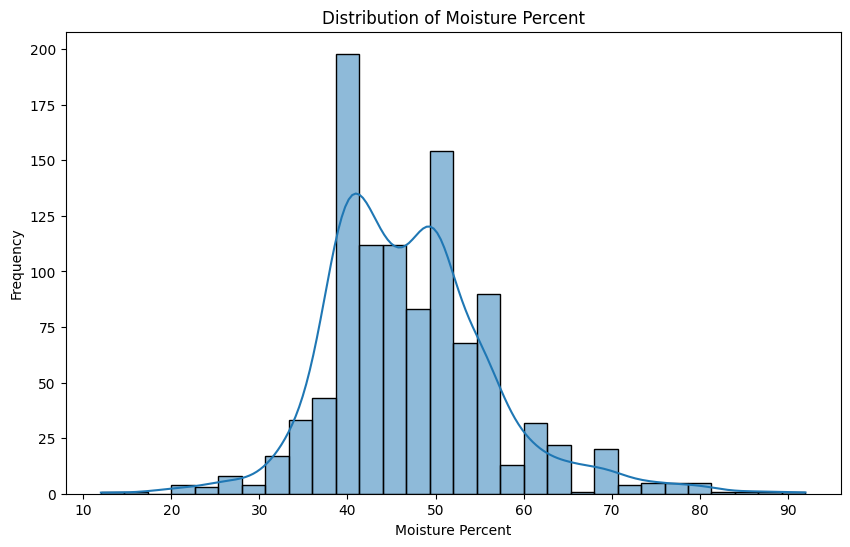

In [7]:
# Distribution of Moisture Percent
plt.figure(figsize=(10, 6))
sns.histplot(df['MoisturePercent'], kde=True, bins=30)
plt.title('Distribution of Moisture Percent')
plt.xlabel('Moisture Percent')
plt.ylabel('Frequency')
plt.show()

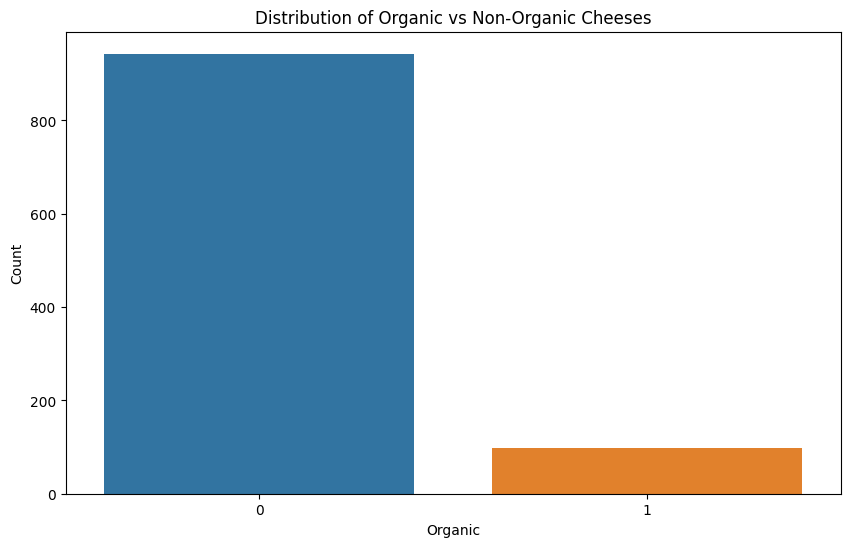

In [8]:
# Distribution of Organic vs Non-Organic Cheeses
plt.figure(figsize=(10, 6))
sns.countplot(x='Organic', data=df)
plt.title('Distribution of Organic vs Non-Organic Cheeses')
plt.xlabel('Organic')
plt.ylabel('Count')
plt.show()

### Correlation Analysis

Let's examine the correlation between numeric variables in the dataset.

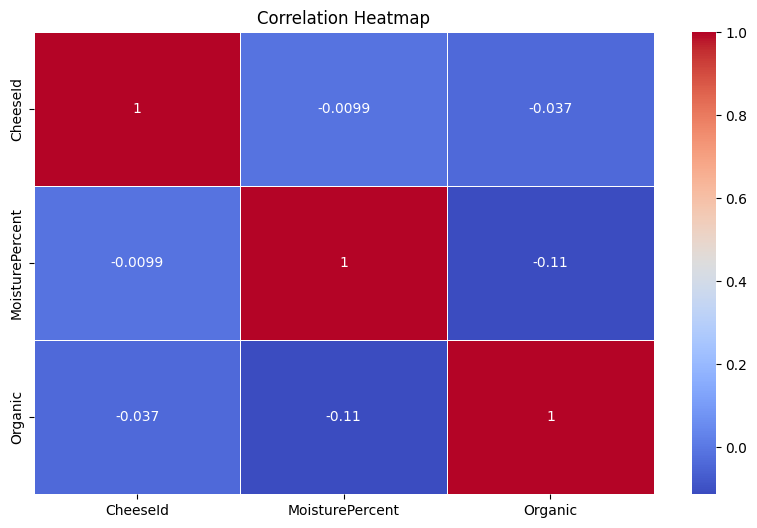

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Predicting Cheese Characteristics

Based on the data, it might be interesting to predict whether a cheese is organic or not based on its other characteristics.

In [10]:
# Prepare the data for prediction
X = df[['MoisturePercent']]
y = df['Organic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix

(0.9265175718849841,
 '              precision    recall  f1-score   support\n\n           0       0.93      0.99      0.96       291\n           1       0.33      0.05      0.08        22\n\n    accuracy                           0.93       313\n   macro avg       0.63      0.52      0.52       313\nweighted avg       0.89      0.93      0.90       313\n',
 array([[289,   2],
        [ 21,   1]]))

### Conclusion and Future Work

In this notebook, we explored the Canadian Cheese Directory dataset, performed some initial data cleaning, and conducted exploratory data analysis. We also built a simple model to predict whether a cheese is organic based on its moisture content.

Future analysis could include:
- Exploring other features for prediction
- Building more complex models
- Analyzing the impact of different cheese characteristics on flavor

What do you think would be useful to explore next?

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)